In [47]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from random import choice

# Approximating Images with circles using Differential Evolution Algorithms


In [48]:
from differential_evolution import differential_evolution
from AuxFunctions import show_image, load_image, add_circle, show_fitness, filename_from_path

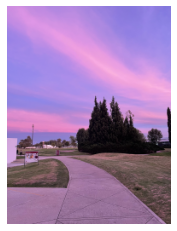

(256, 192, 3)


In [49]:
path = '../Images/sky.jpg'
target = load_image(path, size=(192,256))
#target = load_image('../Images/arbol.png', size=(64,64))
show_image(target)
print(target.shape)

In [50]:
phenotype = np.zeros(shape=target.shape)
phenotype.fill(255)

In [51]:
def objective_function(P):
    global target
    global phenotype
    
    new_phenotype = add_circle(phenotype, P)

    max_error = (np.square((1 - (target >= 127)) * 255 - target)).mean(axis=None)
    fit = (np.square(new_phenotype - target)).mean(axis=None)
    fit = (max_error - fit) / max_error
        
    return 1 - fit

In [52]:
def callback(P):
    global phenotype
    phenotype = add_circle(phenotype, P)
    #show_image(phenotype)

In [53]:
bounds = [
    [0,1],                      # 1 X position
    [0,1],                      # 2 Y position
    [0,1],                      # 3 Radius
    [0,1],                      # 4 Red
    [0,1],                      # 5 Green
    [0,1],                      # 6 Blue
    [0,1]                       # 7 Alpha
]

In [54]:
def approximate_image(target, iterations=None):
    phenotype.fill(255)

    if iterations == None:
        res = differential_evolution(func=objective_function, bounds=bounds, callback=callback)
        img_res = np.copy(phenotype)
        show_fitness(target, [[img_res, 1000]])

    outputs = []
    for iter in iterations:
        res = differential_evolution(func=objective_function, bounds=bounds, niter=iter, callback=callback)
        outputs.append([np.copy(phenotype), iter])
    
    show_fitness(target, outputs)
        

GEN 99, FIT 0.04931422


TypeError: unsupported operand type(s) for /: 'list' and 'int'

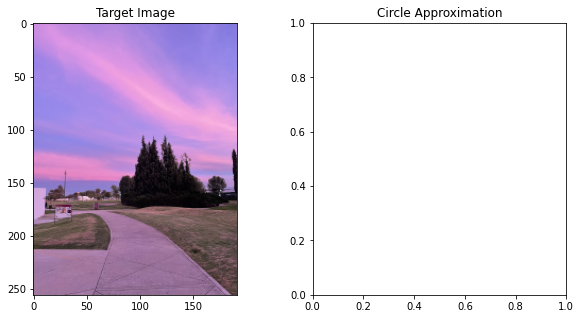

In [55]:
approximate_image(target, [10, 100])